In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(4212)

Chapter 1 Slide 10 Exercise


A useful write-up on covariances
https://towardsdatascience.com/5-things-you-should-know-about-covariance-26b12a0516f1#:~:text=It%20is%20a%20symmetric%20matrix,data%20spread%20among%20two%20dimensions.

In [ ]:
N = 500
d = 300
###### Q1

X = np.random.normal(0, 1, size=(N,d))
print("X.shape:", X.shape)

# must transpose the origin matrix before np.cov()
S = np.cov(X.T)
print("S.shape:", S.shape)

plt.imshow(S)
plt.colorbar()

##### Q2

eigenvalues, eigenvectors = np.linalg.eigh(S)

print(eigenvalues >= 0)
print("A covariance matrix is positive semidefinite hence its eigenvalues are nonnegative")

##### Q3

plt.hist(eigenvalues, bins=50)
plt.show()

##### Q4
Y = np.random.normal(0, 1, size=(1000000,300))
Sy = np.cov(Y.T)
eigenvalues_y, eigenvectors_y = np.linalg.eigh(Sy)
plt.hist(eigenvalues_y, bins=100)
plt.show()

Chapter 1 Slide 11 Exercise


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


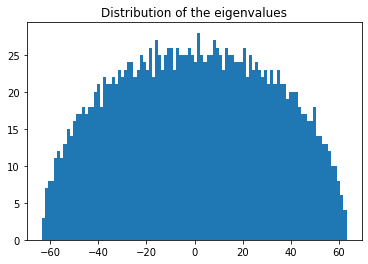

In [ ]:
##### Q1
# Prove that M is symmetric

A = np.random.normal(0, 1, size=(2000,2000))
M = 0.5 * np.add(A, A.T)
print(M == M.T)
# Save A and see how much disk space is taken

##### Q2

eigenvalues_M, eigenvectos_M = np.linalg.eigh(M)
plt.hist(eigenvalues_M, bins=100)
plt.title("Distribution of the eigenvalues")
plt.show()

Chapter 1 Slide 16 Exercise

In [ ]:
M = np.array([[1., -1.], [-1., 1.]])
eigenvalues, _ = np.linalg.eigh(M)
print(eigenvalues)
# M is p.s.d but not p.d because some of the eigenvalues are zero

[0. 2.]


Chapter 1 Slide 17 Exercise

In [ ]:
##### Q2 
import time

d = 50
A = np.random.normal(0, 1, size=(d,d))

start = time.time()
A_inv = np.linalg.inv(A)
end = time.time()
time_taken = end - start
print(time_taken)

0.003240346908569336


In [ ]:
dim_list = np.arange(50, 2000, 100)
time_list = []

for d in dim_list:
  A = np.random.normal(0, 1, size=(d,d))
  start = time.time()
  A_inv = np.linalg.inv(A)
  end = time.time()
  time_taken = end - start
  time_list.append(time_taken)
print(time_list)

[0.0005841255187988281, 0.0014662742614746094, 0.008324623107910156, 0.013073205947875977, 0.018733978271484375, 0.03055739402770996, 0.043882131576538086, 0.06603765487670898, 0.08796310424804688, 0.12086176872253418, 0.16161036491394043, 0.20097661018371582, 0.21755719184875488, 0.286602258682251, 0.3512752056121826, 0.42046427726745605, 0.5022907257080078, 0.6222648620605469, 0.6758866310119629, 0.7929935455322266]


Text(0, 0.5, 'Time')

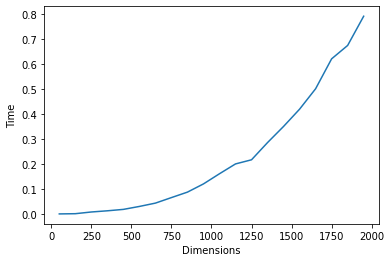

In [ ]:
plt.plot(dim_list, time_list)
plt.xlabel('Dimensions')
plt.ylabel('Time')

'\nFor example, to compute Ax = b，\n\nBad way to compute:\nA_inv = np.linalg.inv(A)\nx = A_inv @ b\n\nGood way:\nx = np.linalg.solve(A, b)\n'

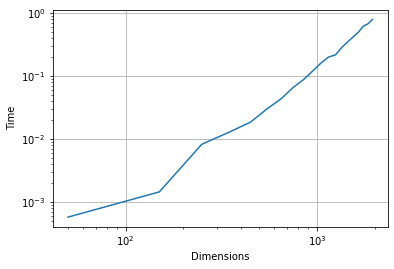

In [ ]:
# time ~ d^power
# log(time) ~ power * log(d)
# Estimate the slope

plt.plot(dim_list, time_list)
plt.xlabel('Dimensions')
plt.ylabel('Time')

plt.xscale('log')
plt.yscale('log')
plt.grid()

# Current best method to invert a matrix has time complexity O(d^2.37). Inverting a matrix should generally be avoided
"""
For example, to compute Ax = b，

Bad way to compute:
A_inv = np.linalg.inv(A)
x = A_inv @ b

Good way:
x = np.linalg.solve(A, b)
"""

Jax

In [1]:
import numpy as np
import jax
import jax.numpy as jnp

print(jax.__version__)

0.3.25


In [2]:
@jax.jit

def f(x):
  return jnp.mean(x**2)

x = np.array([1.,2.,3.])
print(f(x))

4.666667


In [5]:
# (1/d)*(x_1**2 + x_2**2 + ... +x_d**2)
# grad = [(2/d)*x_1, (2/d)*x_2, ..., (2/d)*x_d]

f_grad = jax.grad(f)
f_hessian = jax.hessian(f)

print(f_grad(x))
print(f_hessian(x))

[0.6666667 1.3333334 2.       ]
[[0.6666667 0.        0.       ]
 [0.        0.6666667 0.       ]
 [0.        0.        0.6666667]]


In [7]:
def g(x,y,z):
  return jnp.mean(x**2+y**2+z**2)

# to compute the gradient of the function g wrt y
# cannot do jax.grad(g)
g_grad_x = jax.grad(g)
g_grad_y = jax.grad(g, argnums=1)
g_grad_y = jax.grad(g, argnums=2)

def h(param):
  # param = [x, y, z]
  x,y,z = param
  return jnp.mean(x**2+y**2+z**2)

param = [np.array([1.,2.]), np.array([0.,2.]), np.array([4.,3.])]
h_grad = jax.grad(h)

h_grad(param)

[DeviceArray([1., 2.], dtype=float32),
 DeviceArray([0., 2.], dtype=float32),
 DeviceArray([4., 3.], dtype=float32)]